In [432]:
# %load poi_id.py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

### Task 0: Data Overview 

In [433]:
# read the all data
## Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)


In [434]:
# data overview
import pandas as pd
import numpy as np
df = pd.DataFrame(data_dict)
df = df.T
number_of_non_poi, number_of_poi = df['poi'].value_counts()
print "number of columns:", len(df.columns)
print "name of the columns:\n", df.columns
print "number of non pois / pois:", number_of_non_poi, '/', number_of_poi


number of columns: 21
name of the columns:
Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees', u'email_address',
       u'exercised_stock_options', u'expenses', u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive', u'other', u'poi',
       u'restricted_stock', u'restricted_stock_deferred', u'salary', u'shared_receipt_with_poi',
       u'to_messages', u'total_payments', u'total_stock_value'],
      dtype='object')
number of non pois / pois: 128 / 18


In [435]:
all_features_list = df.columns
nan_index = df.columns
nan_columns = ['non_nan', 'nan', 'nan_poi','nan_non_poi', 'poi_nan_ratio', 'non_poi_nan_ratio']
df_nan = pd.DataFrame(index=nan_index, columns=nan_columns)
df_nan = df_nan.fillna(0)

for i in all_features_list:
    for j in df.index:
        if df[i][j] == 'NaN':
            df_nan['nan'][i]+=1
            if df['poi'][j] == True:
                
                df_nan['nan_poi'][i]+=1
            else:
                df_nan['nan_non_poi'][i]+=1
        else:
            df_nan['non_nan'][i]+=1

# poi_nan_ratio column
for i in all_features_list:
    if df_nan['nan_poi'][i] == 0:
        df_nan['poi_nan_ratio'][i] == 'NaN'
    else:
        df_nan['poi_nan_ratio'][i] = round((df_nan['nan_poi'][i])*100.0/number_of_poi, 2)

# non_poi_nan_ratio column
for i in all_features_list:
    if df_nan['nan_non_poi'][i] == 0:
            df_nan['non_poi_nan_ratio'][i] == 'NaN'
    else:
        df_nan['non_poi_nan_ratio'][i] = round((df_nan['nan_non_poi'][i])*100.0/number_of_non_poi, 2)

df_nan_1 = df_nan[['non_nan', 'nan']].sort_values(by=['nan'], ascending = True)
df_nan_2 = df_nan[['poi_nan_ratio', 'non_poi_nan_ratio']].sort_values(by=['poi_nan_ratio'], ascending = True)


print 'Number of missing values in data'       
print df_nan_1['nan']

Number of missing values in data
poi                            0
total_stock_value             20
total_payments                21
email_address                 35
restricted_stock              36
exercised_stock_options       44
salary                        51
expenses                      51
other                         53
to_messages                   60
shared_receipt_with_poi       60
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
bonus                         64
long_term_incentive           80
deferred_income               97
deferral_payments            107
restricted_stock_deferred    128
director_fees                129
loan_advances                142
Name: nan, dtype: int64


In [436]:
print 'Ratio of missing values in POI / non-POIs'     
print df_nan_2

Ratio of missing values in POI / non-POIs
                           poi_nan_ratio  non_poi_nan_ratio
total_stock_value                      0                 15
poi                                    0                  0
email_address                          0                 27
other                                  0                 41
expenses                               0                 39
total_payments                         0                 16
salary                                 5                 39
restricted_stock                       5                 27
bonus                                 11                 48
from_this_person_to_poi               22                 43
from_messages                         22                 43
shared_receipt_with_poi               22                 43
to_messages                           22                 43
from_poi_to_this_person               22                 43
long_term_incentive                   33                 5

### Task 2: Remove Outliers

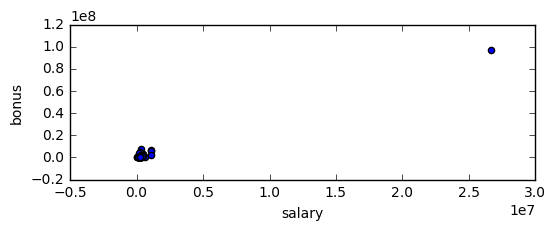

In [437]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(6,2))

### Task 2: Remove outliers
# plot the salary and the bonus data
features_outliers = ["salary", "bonus"]
data_outliers = featureFormat(data_dict, features_outliers)

for point in data_outliers:
    salary = point[0]
    bonus = point[1]
    plt.scatter(salary,bonus)

plt.xlabel("salary")
plt.ylabel("bonus");

In [438]:
# find the key of outlier
for key, value in data_dict.items():
    if value['bonus'] == data_outliers.max():
        print 'max:', key, data_outliers.max()

max: TOTAL 97343619.0


In [439]:
# remove the outlier 'TOTAL'
data_dict.pop('TOTAL', 0 )

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

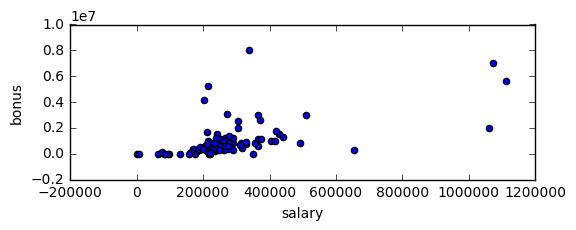

In [440]:
# second plot
data_outliers = featureFormat(data_dict, features_outliers)
for point in data_outliers:
    salary = point[0]
    bonus = point[1]
    plt.scatter(salary,bonus)
    
plt.xlabel("salary")
plt.ylabel("bonus");

In [441]:
outlier_bonus =5000000
outlier_salary = 500000

both_outlier = []
for key, value in data_dict.items():
    if value['bonus'] == 'NaN':
        pass
    elif value['bonus'] > outlier_bonus:
        if value['salary'] > outlier_salary:
            both_outlier.append(key)
    else:
        pass
print 'people whose both bonus and salary are away from other data points'   
print both_outlier

bonus_outlier = []
for key, value in data_dict.items():
    if value['bonus'] == 'NaN':
        pass
    elif value['bonus'] > outlier_bonus:
        if value['salary'] > outlier_salary:
            pass
        else:
            bonus_outlier.append(key)
    else:
        pass

print 'people whose only bonus is away from other data points'       
print bonus_outlier

salary_outlier = []
for key, value in data_dict.items():
    if value['salary'] == 'NaN':
        pass
    elif value['salary'] > outlier_salary:
        if value['bonus'] > outlier_bonus:
            pass
        else:
            salary_outlier.append(key)
    else:
        pass

print 'people whose only bonus is away from other data points'       
print salary_outlier

people whose both bonus and salary are away from other data points
['LAY KENNETH L', 'SKILLING JEFFREY K']
people whose only bonus is away from other data points
['LAVORATO JOHN J', 'BELDEN TIMOTHY N']
people whose only bonus is away from other data points
['WHALLEY LAWRENCE G', 'PICKERING MARK R', 'FREVERT MARK A']


In [442]:
# find poi/non-poi of outlier
outlier_list = both_outlier + bonus_outlier + salary_outlier

poi_outlier = []
non_poi_outlier = []
for key in outlier_list:
    poi_value = df.get_value(index=key, col='poi')
    if poi_value == True:
        poi_outlier.append(key)
        print '{:>20}: {}'.format(key, poi_value)
    else:
        non_poi_outlier.append(key)  
        print '{:>20}: {}'.format(key, poi_value)


       LAY KENNETH L: True
  SKILLING JEFFREY K: True
     LAVORATO JOHN J: False
    BELDEN TIMOTHY N: True
  WHALLEY LAWRENCE G: False
    PICKERING MARK R: False
      FREVERT MARK A: False


In [443]:
# remove the non-poi outlier
for key in non_poi_outlier:
    data_dict.pop(key, 0 )

# total number of poi nd non-poi after outlier removal    
df = pd.DataFrame(data_dict)
df = df.T
number_of_non_poi, number_of_poi = df['poi'].value_counts()
print "number of non-pois / pois:", number_of_non_poi, '/', number_of_poi

number of non-pois / pois: 123 / 18


### Task 4. Try a Variety of Classifiers

In [444]:
# cross validation would be done by StratifiedShuffleSplit, based on f1 score
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

def validate(features, labels):
    '''
    Ten-fold cross-validation with stratified sampling.
    '''
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    sss = StratifiedShuffleSplit(labels, n_iter=10)
    for train_index, test_index in sss:
        
        features = np.asarray(features)
        labels = np.asarray(labels)
        features_train, features_test = features[train_index], features[test_index]
        labels_train, labels_test = labels[train_index], labels[test_index]
        clf.fit(features_train, labels_train)
        y_pred = clf.predict(features_test)
        accuracy_scores.append(accuracy_score(labels_test, y_pred))
        precision_scores.append(precision_score(labels_test, y_pred))
        recall_scores.append(recall_score(labels_test, y_pred))
        f1_scores.append(f1_score(labels_test, y_pred))

    return np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)   

In [468]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

# all features initially available and the first feature is 'poi'
features_list = list(all_features_list)

# bring the 'poi' feature first on the list for later data process
def poi_first(features_list):
    poi_index = features_list.index('poi')
    if poi_index == 0:
        pass
    else:
        features_list[poi_index], features_list[0] = features_list[0], features_list[poi_index]

poi_first(features_list)
        
# remove email address from all features
features_list.remove('email_address')

### Extract features and labels from dataset again with the new features_list
from feature_format import featureFormat, targetFeatureSplit
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# split data into train and test data
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [458]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import precision_score, recall_score, f1_score

# loop over several models to find the best one [1][5]
classifiers = [
    AdaBoostClassifier(),
    GaussianNB(),
    svm.SVC(),
    DecisionTreeClassifier()
    ]

def clf_df(classifiers, features, labels):
    clf_col = ['clf', 'precision', 'recall', 'f1 score']
    clf_df = pd.DataFrame(index=[], columns=clf_col)
    
    for clf in classifiers:
        precision, recall, f1score = validate(features, labels)
        series = pd.Series([clf, precision, recall, f1score], index=clf_df.columns)
        clf_df = clf_df.append(series, ignore_index = True)
    return clf_df

print 'accuracy, precision, reacall and f1 scores of each classifier'
clf_df(classifiers, features, labels)

accuracy, precision, reacall and f1 scores of each classifier


clf  precision  recall  f1 score
0                                                 ()   0.250000    0.30  0.253333
1                                       GaussianNB()   0.191667    0.30  0.230000
2  SVC(C=1.0, cache_size=200, class_weight=None, ...   0.216667    0.20  0.196667
3  DecisionTreeClassifier(class_weight=None, crit...   0.283333    0.35  0.293333

In [469]:
# from the clf_df result, choose the best algorithm to predict poi / non-poi
classifiers = [
    AdaBoostClassifier(),
    DecisionTreeClassifier()
    ]

In [470]:
# features scaling is not needed with DecisionTreeClassifier() in general [3][4]

In [471]:
'''
### feature importances on decision tree classifier
clf.fit(features, labels)
FeatureImportances = clf.feature_importances_
FeatureImportances = sorted(FeatureImportances, reverse=True)
features_list_rm_poi = list(features_list)
features_list_rm_poi.pop(0)

print 'feature importances by order'
for i, feat in enumerate(features_list_rm_poi):
    print feat, ':', FeatureImportances[i]
'''

"\n### feature importances on decision tree classifier\nclf.fit(features, labels)\nFeatureImportances = clf.feature_importances_\nFeatureImportances = sorted(FeatureImportances, reverse=True)\nfeatures_list_rm_poi = list(features_list)\nfeatures_list_rm_poi.pop(0)\n\nprint 'feature importances by order'\nfor i, feat in enumerate(features_list_rm_poi):\n    print feat, ':', FeatureImportances[i]\n"

### Task 3: Create New Features

In [473]:
### Task 3: Create new feature(s)
from fractions import Fraction

### new feature 1: portion of from/to poi messages within all from/to messages
def computeFraction( poi_messages, all_messages ):
    """ given a number messages to/from POI (numerator) 
        and number of all messages to/from a person (denominator),
        return the fraction of messages to/from that person
        that are from/to a POI
   """

    fraction = 0.
    if 'email_address' == 'NaN':
        return 0
    else:
        if all_messages == 0 or all_messages == 'NaN':
            fraction = 0
        if poi_messages == 'NaN':
            fraction = 0
        else:
            fraction = Fraction(poi_messages, all_messages)
    return fraction


for name in my_dataset:

    data_point = my_dataset[name]

    from_poi_to_this_person = data_point['from_poi_to_this_person']
    to_messages = data_point['to_messages']
    fraction_from_poi = computeFraction( from_poi_to_this_person, to_messages )
    data_point['fraction_from_poi'] = fraction_from_poi

    from_this_person_to_poi = data_point['from_this_person_to_poi']
    from_messages = data_point['from_messages']
    fraction_to_poi = computeFraction( from_this_person_to_poi, from_messages )
    data_point['fraction_to_poi'] = fraction_to_poi

# add new features to features_list
features_list.extend(['fraction_from_poi', 'fraction_to_poi'])

### Extract features and labels from dataset again with the new features_list
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# validation of the clf with new features
clf_df(classifiers, features, labels)

clf  precision  recall  f1 score
0                                                 ()   0.383333    0.35  0.333333
1  DecisionTreeClassifier(class_weight=None, crit...   0.445000    0.55  0.458571

In [474]:
clf = DecisionTreeClassifier()

### Task 1: Feature Selection 

In [476]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

# select features for Decision Tree Classifier using SelectKBest, connecting with Pipeline 
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.grid_search import GridSearchCV

# features_list and data for now
# features_list
features_list = list(all_features_list)
features_list.remove('email_address')
features_list.extend(['fraction_from_poi', 'fraction_to_poi'])
poi_first(features_list)

# data 
### Extract features and labels from dataset again with the new features_list
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


# kbest with pipeline
n_features = np.arange(1, len(features_list))
kbest = SelectKBest(f_classif)
pipeline = Pipeline([('kbest', kbest), ('DT', DecisionTreeClassifier())])

parameters = {
    'kbest__k':n_features
}

grid_search = GridSearchCV(pipeline, parameters, scoring='f1', cv=10)

grid_search.fit(features, labels)
grid_scores = pd.DataFrame(grid_search.grid_scores_)

print 'grid search score'
pd.set_option('display.width', 100)
print grid_scores

print '\nbest parameters set'
best_k = grid_search.best_params_
print best_k

clf = grid_search
validate(features, labels)

grid search score
           parameters  mean_validation_score                               cv_validation_scores
0    {u'kbest__k': 1}               0.280952  [0.8, 0.0, 0.0, 0.666666666667, 0.0, 0.0, 0.66...
1    {u'kbest__k': 2}               0.336905  [0.333333333333, 0.5, 0.0, 0.666666666667, 0.0...
2    {u'kbest__k': 3}               0.347857  [0.5, 1.0, 0.0, 0.5, 0.5, 0.0, 0.5, 0.0, 0.4, ...
3    {u'kbest__k': 4}               0.307857  [0.4, 0.666666666667, 0.0, 0.4, 0.571428571429...
4    {u'kbest__k': 5}               0.283571  [0.333333333333, 0.666666666667, 0.0, 0.0, 0.5...
5    {u'kbest__k': 6}               0.316429  [0.333333333333, 0.8, 0.4, 0.0, 0.285714285714...
6    {u'kbest__k': 7}               0.227381  [0.0, 0.8, 0.285714285714, 0.0, 0.0, 0.0, 0.66...
7    {u'kbest__k': 8}               0.264524  [0.0, 0.666666666667, 0.4, 0.0, 0.4, 0.0, 0.66...
8    {u'kbest__k': 9}               0.280952  [0.0, 1.0, 0.333333333333, 0.0, 0.285714285714...
9   {u'kbest__k': 10} 

(0.39000000000000001, 0.55000000000000004, 0.42714285714285716)

In [477]:
# when k=11 for SelectKBest
kbest = SelectKBest(f_classif, k=11)

# remove labels('poi') from the features_list
features_list_rm_poi = features_list
features_list_rm_poi.remove('poi')

features_df = pd.DataFrame(features, columns=features_list_rm_poi)
labels_df = pd.DataFrame(labels)

kbest.fit(features, labels)
features_new = kbest.transform(features)
kbest_features = features_df.columns[kbest.get_support(indices=True)].tolist()
kbest_scores = kbest.scores_

kbest_features = []
for i in np.argsort(kbest_scores):
    kbest_features.append(features_list_rm_poi[i])

kbest_scores = list(kbest_scores)    
kbest_scores = sorted(kbest_scores, reverse=True)

# print 11 best features and its scores
for i in range(11):
    print '{:>25}: {}'.format(kbest_features[i], kbest_scores[i])

# rewrite the features_list with the best_k best features 
features_list = ['poi'] + kbest_features[:11]

restricted_stock_deferred: 35.6553029979
        deferral_payments: 27.9683623999
            from_messages: 26.081456944
            director_fees: 25.7158047926
              to_messages: 16.5121282726
  from_this_person_to_poi: 15.7179606972
        fraction_from_poi: 12.44860887
                 expenses: 11.9468554363
                    other: 11.7959775751
            loan_advances: 9.89055426333
           total_payments: 9.51420263834


In [478]:
# data with new feature list
### Extract features and labels from dataset again with the new features_list
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 5: Tune Your Classifier

In [479]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html
# [8]

In [480]:
# select features using SelectKBest and GridSearch CV, connecting them with pipeline [3][6][7]

n_features = np.arange(1, len(features_list))
kbest = SelectKBest(f_classif, k=11)
pipeline = Pipeline([('kbest', kbest), ('DT', DecisionTreeClassifier())])

parameters = {
    'DT__criterion':['gini', 'entropy'], 
    'DT__min_samples_split':[2, 4, 6, 8, 10, 20],
    'DT__max_depth':[None, 5, 10, 15, 20],
    'DT__min_samples_leaf':[2, 4, 6, 8, 10, 20]
}

grid_search = GridSearchCV(pipeline, parameters, cv=10)

grid_search.fit(features, labels)
grid_search.grid_scores_

print 'best parameters set'
print grid_search.best_params_

clf = grid_search
print clf

/Users/sarauenoyama/anaconda2/envs/DAND/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [9] are constant.
  UserWarning)


best parameters set
{'DT__criterion': 'entropy', 'DT__max_depth': None, 'DT__min_samples_leaf': 6, 'DT__min_samples_split': 20}
GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('kbest', SelectKBest(k=11, score_func=<function f_classif at 0x11048f2a8>)), ('DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'DT__criterion': ['gini', 'entropy'], 'DT__max_depth': [None, 5, 10, 15, 20], 'DT__min_samples_split': [2, 4, 6, 8, 10, 20], 'DT__min_samples_leaf': [2, 4, 6, 8, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [481]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=6, min_samples_split=20)
validate(features, labels)

(0.47499999999999998, 0.55000000000000004, 0.48666666666666664)

### Task 6: Dump Your Classifier, dataset, and features_list

In [482]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

from tester import dump_classifier_and_data
dump_classifier_and_data(clf, my_dataset, features_list)

In [483]:
# %load tester.py
#!/usr/bin/pickle

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""

import pickle
import sys
from sklearn.cross_validation import StratifiedShuffleSplit
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(CLF_PICKLE_FILENAME, "w") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(FEATURE_LIST_FILENAME, "w") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

def load_classifier_and_data():
    with open(CLF_PICKLE_FILENAME, "r") as clf_infile:
        clf = pickle.load(clf_infile)
    with open(DATASET_PICKLE_FILENAME, "r") as dataset_infile:
        dataset = pickle.load(dataset_infile)
    with open(FEATURE_LIST_FILENAME, "r") as featurelist_infile:
        feature_list = pickle.load(featurelist_infile)
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=6,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.87436	Precision: 0.57564	Recall: 0.45850	F1: 0.51044	F2: 0.47795
	Total predictions: 14000	True positives:  917	False positives:  676	False negatives: 1083	True negatives: 11324



## Reference List

[1]: scikit-learn. Choosing the right estimator. Retrieved from https://scikit-learn.org/stable/tutorial/machine_learning_map

[2]: Medium. Why, How and When to Scale your Features. Retrieved from https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e

[3]: scikit-learn. sklearn.tree.DecisionTreeClassifier. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  

[4]: data school. Comparing supervised learning algorithms. Retrieved from https://www.dataschool.io/comparing-supervised-learning-algorithms/

[5]: scikit-learn. sklearn.model_selection.GridSearchCV. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

[6]: Medium. A brief view of machine learning pipeline in python. Retrieved from https://medium.com/@yanhann10/a-brief-view-of-machine-learning-pipeline-in-python-5f50b941fca8

[7]: Quora. How do I properly use SelectKBest, GridSearchCV, and cross-validation in the sklearn package together?. Retrieved from https://www.quora.com/How-do-I-properly-use-SelectKBest-GridSearchCV-and-cross-validation-in-the-sklearn-package-together

[8]: busigence. Hyperparameter Optimization and Why is it important?. Retrieved from http://busigence.com/blog/hyperparameter-optimization-and-why-is-it-important  

[9]: programcreek. Python sklearn.model_selection.StratifiedShuffleSplit() Examples. Retrieved from https://www.programcreek.com/python/example/91149/sklearn.model_selection.StratifiedShuffleSplit  

[10]: w3cub. sklearn.model_selection.StratifiedShuffleSplit. Retrieved from  http://docs.w3cub.com/scikit_learn/modules/generated/sklearn.model_selection.stratifiedshufflesplit/#sklearn.model_selection.StratifiedShuffleSplit

I hereby confirm that this submission is my work. I have cited above the origins of any parts of the submission that were taken from Websites, books, forums, blog posts, github repositories, etc.

In [100]:
# cross validation with KFold
from sklearn.cross_validation import KFold

kf = KFold(len(features), n_folds=2, shuffle = True)
features = np.array(features)
labels = np.array(labels)
for train_indices, test_indices in kf:
    features_train_kf = features[train_indices]
    features_test_kf = features[test_indices]
    labels_train_kf = labels[train_indices]
    labels_test_kf = labels[test_indices]

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(features_train_kf, labels_train_kf)
clf.score(features_test_kf, labels_test_kf)

pred_kf = clf.predict(features_test)
precision = precision_score(labels_test, pred_kf, average='binary')
recall = recall_score(labels_test, pred_kf, average='binary')

print '\nscore:', score, 'precision:', precision, 'recall:', recall

ValueError: Number of features of the model must  match the input. Model n_features is 23 and  input n_features is 19 

In [50]:
# validation using kfold cross validation
from sklearn.cross_validation import KFold 

kfold = KFold(3, n_folds=3, shuffle=True, random_state=1)

for train, test in kfold:
    print train
    print test

[1 2]
[0]
[0 1]
[2]
[0 2]
[1]
